In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
dataset = pd.read_csv(url, header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
features = dataset.iloc[:, 1:]
targets = dataset.iloc[:, 0]

# Converte o dataframe para uma matriz de NumPy
data = features.values
X = data.astype(float)

In [3]:
# Normalizando utilizando Z-score
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Converter de volta para dataframe
df_normalized = pd.DataFrame(X)

# Criando uma instancia do modelo PCA com 3 componentes
pca = PCA(n_components=3)

# Ajustando o modelo aos dados
X_pca = pca.fit_transform(X)

# Transformando o modelo de PCA em um dataframe
df_pca = pd.DataFrame(X_pca)

##Utilizando KNN para descobrir valores para eps

In [4]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

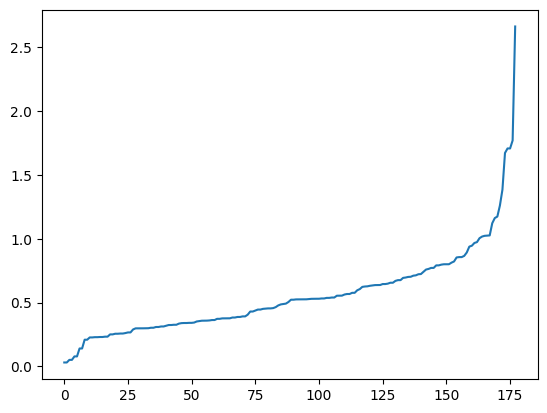

In [5]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [6]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

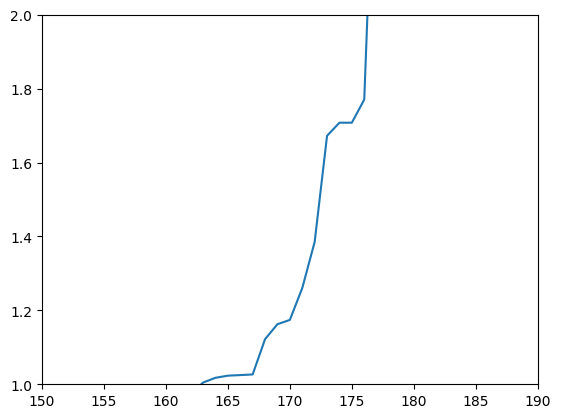

In [7]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlim(150, 190)
plt.ylim(1, 2)
plt.show()

In [8]:
# descobrindo o valor ótimo
eps_test = np.arange(0.5, 2.0, 0.05)

for eps in eps_test:
  model = DBSCAN(eps=eps, min_samples=26)
  model.fit(df_pca)
  labels = model.labels_

  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)

  print("eps: " + str(eps))
  print("Num de clusters: " + str(n_clusters))
  print("Num amostras de ruido: " + str(n_noise))

eps: 0.5
Num de clusters: 0
Num amostras de ruido: 178
eps: 0.55
Num de clusters: 0
Num amostras de ruido: 178
eps: 0.6000000000000001
Num de clusters: 0
Num amostras de ruido: 178
eps: 0.6500000000000001
Num de clusters: 0
Num amostras de ruido: 178
eps: 0.7000000000000002
Num de clusters: 0
Num amostras de ruido: 178
eps: 0.7500000000000002
Num de clusters: 0
Num amostras de ruido: 178
eps: 0.8000000000000003
Num de clusters: 0
Num amostras de ruido: 178
eps: 0.8500000000000003
Num de clusters: 0
Num amostras de ruido: 178
eps: 0.9000000000000004
Num de clusters: 0
Num amostras de ruido: 178
eps: 0.9500000000000004
Num de clusters: 0
Num amostras de ruido: 178
eps: 1.0000000000000004
Num de clusters: 0
Num amostras de ruido: 178
eps: 1.0500000000000005
Num de clusters: 0
Num amostras de ruido: 178
eps: 1.1000000000000005
Num de clusters: 1
Num amostras de ruido: 152
eps: 1.1500000000000006
Num de clusters: 1
Num amostras de ruido: 141
eps: 1.2000000000000006
Num de clusters: 1
Num am

In [9]:
# realizando uma veririficação mais precisa
eps_test = np.arange(1.45, 1.60, 0.01)

for eps in eps_test:
  model = DBSCAN(eps=eps, min_samples=26)
  model.fit(df_pca)
  labels = model.labels_

  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)

  print("eps: " + str(eps))
  print("Num de clusters: " + str(n_clusters))
  print("Num amostras de ruido: " + str(n_noise))

eps: 1.45
Num de clusters: 3
Num amostras de ruido: 51
eps: 1.46
Num de clusters: 3
Num amostras de ruido: 46
eps: 1.47
Num de clusters: 3
Num amostras de ruido: 44
eps: 1.48
Num de clusters: 3
Num amostras de ruido: 43
eps: 1.49
Num de clusters: 3
Num amostras de ruido: 43
eps: 1.5
Num de clusters: 3
Num amostras de ruido: 39
eps: 1.51
Num de clusters: 3
Num amostras de ruido: 35
eps: 1.52
Num de clusters: 3
Num amostras de ruido: 35
eps: 1.53
Num de clusters: 3
Num amostras de ruido: 31
eps: 1.54
Num de clusters: 3
Num amostras de ruido: 30
eps: 1.55
Num de clusters: 3
Num amostras de ruido: 30
eps: 1.56
Num de clusters: 3
Num amostras de ruido: 24
eps: 1.57
Num de clusters: 3
Num amostras de ruido: 24
eps: 1.58
Num de clusters: 3
Num amostras de ruido: 18
eps: 1.59
Num de clusters: 2
Num amostras de ruido: 16
eps: 1.6
Num de clusters: 2
Num amostras de ruido: 16


In [10]:
model = DBSCAN(eps=1.58, min_samples=26)
model.fit(df_pca)
labels = model.labels_

## Procurando o valor ideal para o min_samples

In [11]:
min_samples_test = np.arange(2, 30, 1)
print(min_samples_test)

for m_sample in min_samples_test:
  model = DBSCAN(eps=1.58, min_samples=m_sample)
  model.fit(df_pca)
  labels = model.labels_

  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)

  print("min_samples: " + str(m_sample))
  print("Num de clusters: " + str(n_clusters))
  print("Num amostras de ruido: " + str(n_noise))

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]
min_samples: 2
Num de clusters: 1
Num amostras de ruido: 5
min_samples: 3
Num de clusters: 1
Num amostras de ruido: 5
min_samples: 4
Num de clusters: 1
Num amostras de ruido: 5
min_samples: 5
Num de clusters: 1
Num amostras de ruido: 5
min_samples: 6
Num de clusters: 1
Num amostras de ruido: 5
min_samples: 7
Num de clusters: 1
Num amostras de ruido: 5
min_samples: 8
Num de clusters: 1
Num amostras de ruido: 5
min_samples: 9
Num de clusters: 1
Num amostras de ruido: 5
min_samples: 10
Num de clusters: 1
Num amostras de ruido: 7
min_samples: 11
Num de clusters: 1
Num amostras de ruido: 7
min_samples: 12
Num de clusters: 1
Num amostras de ruido: 8
min_samples: 13
Num de clusters: 1
Num amostras de ruido: 8
min_samples: 14
Num de clusters: 1
Num amostras de ruido: 9
min_samples: 15
Num de clusters: 1
Num amostras de ruido: 9
min_samples: 16
Num de clusters: 1
Num amostras de ruido: 9
min_samples: 17
Num d

In [12]:
# ficaremos com eps = 1.58 e min_samples = 26
model = DBSCAN(eps=1.58, min_samples=26)
model.fit(df_pca)
labels = model.labels_

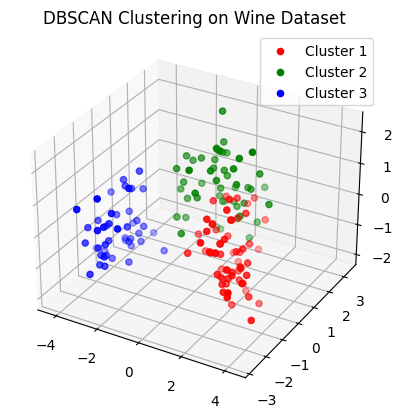

In [14]:
# Plotando
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']

for j in range(n_clusters):
    cluster_indices = np.where(labels == j)[0]
    ax.scatter(df_pca.iloc[cluster_indices, 0], df_pca.iloc[cluster_indices, 1], df_pca.iloc[cluster_indices, 2],
               c=colors[j], label=f'Cluster {j + 1}', marker='o')

ax.legend()
plt.title('DBSCAN Clustering on Wine Dataset')
plt.show()

In [15]:
# medindo o desempenho pelo coeficiente de silhouette
silhouette_avg = metrics.silhouette_score(df_pca, labels)
print("Silhouette cofficient do clustering: " + str(silhouette_avg))

Silhouette cofficient do clustering: 0.4168413951563479
